# 1. Packages

In [1]:
# Source of inspiration
#https://www.newyorkfed.org/research/capital_markets/ycfaq#/interactive

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Import the data file

In [4]:
df = pd.read_csv('allmonth.csv', parse_dates=['Date'], index_col='Date')
df

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
Date,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,NaN,0.0
1959-02-28,3.96,2.70,2.76,1.20,NaN,0.0
1959-03-31,3.99,2.80,2.86,1.13,NaN,0.0
1959-04-30,4.12,2.95,3.01,1.11,NaN,0.0
1959-05-31,4.31,2.84,2.90,1.41,NaN,0.0
...,...,...,...,...,...,...
2025-03-31,NaN,NaN,NaN,NaN,58.31%,NaN
2025-04-30,NaN,NaN,NaN,NaN,50.04%,NaN
2025-05-31,NaN,NaN,NaN,NaN,51.82%,NaN


# 3. Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 1959-01-31 to 2025-07-31
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   10 Year Treasury Yield                          787 non-null    float64
 1   3 Month Treasury Yield                          787 non-null    float64
 2   3 Month Treasury Yield (Bond Equivalent Basis)  787 non-null    float64
 3   Spread                                          787 non-null    float64
 4   Rec_prob                                        787 non-null    object 
 5   NBER_Rec                                        787 non-null    float64
dtypes: float64(5), object(1)
memory usage: 43.7+ KB


Convert the `Rec_prob` column from `0bject` type to `float` type:

In [6]:
#df['Rec_prob'] = pd.to_numeric(df['Rec_prob'])
df['Rec_prob'] = df['Rec_prob'].str.rstrip('%').astype(float)/100
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 1959-01-31 to 2025-07-31
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   10 Year Treasury Yield                          787 non-null    float64
 1   3 Month Treasury Yield                          787 non-null    float64
 2   3 Month Treasury Yield (Bond Equivalent Basis)  787 non-null    float64
 3   Spread                                          787 non-null    float64
 4   Rec_prob                                        787 non-null    float64
 5   NBER_Rec                                        787 non-null    float64
dtypes: float64(6)
memory usage: 43.7 KB


In [7]:
df['Rec_prob']

Date
1959-01-31       NaN
1959-02-28       NaN
1959-03-31       NaN
1959-04-30       NaN
1959-05-31       NaN
               ...  
2025-03-31    0.5831
2025-04-30    0.5004
2025-05-31    0.5182
2025-06-30    0.5583
2025-07-31    0.5629
Name: Rec_prob, Length: 799, dtype: float64

# 4. Plotting Data

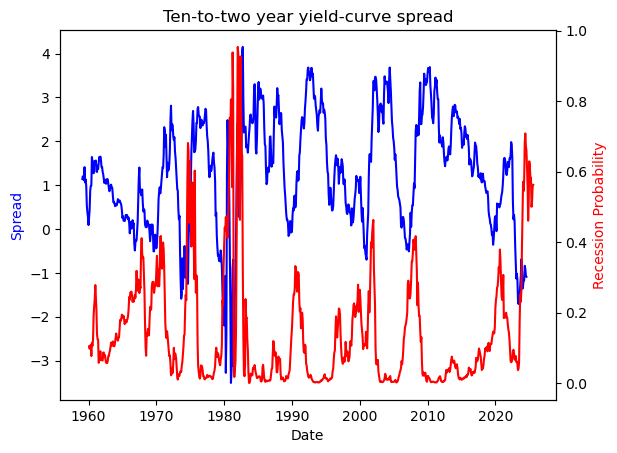

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Spread'], color='blue')
ax2 = ax.twinx()
ax2.plot(df.index, df['Rec_prob'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Spread', color='blue')
ax2.set_ylabel('Recession Probability', color='red')
ax.set_title('Ten-to-two year yield-curve spread')
plt.show()

https://www.chicagofed.org/publications/chicago-fed-letter/2018/404

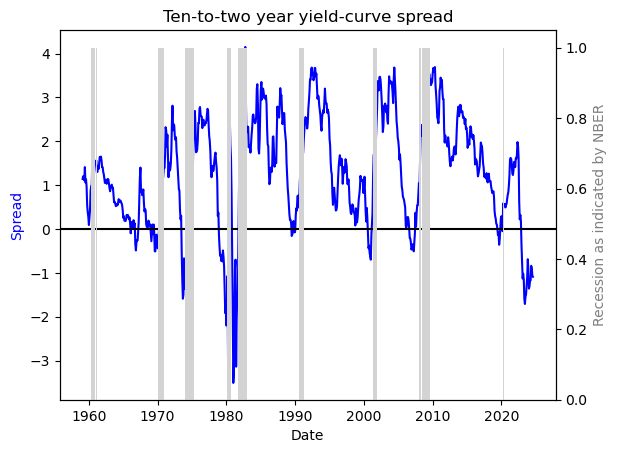

In [9]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Spread'], color='blue')
ax2 = ax.twinx()
ax2.bar(df.index, df['NBER_Rec'], width = 30, color='LightGrey')
ax.axhline(y=0, color='black')
ax.set_xlabel('Date')
ax.set_ylabel('Spread', color='blue')
ax2.set_ylabel('Recession as indicated by NBER', color='grey')
ax.set_title('Ten-to-two year yield-curve spread')
plt.show()

# 5. Create a 12 Months Lag

In [10]:
df['Rec_prob_lagged'] = df.Rec_prob.shift(periods=-12)
df.head(20)

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,Rec_prob_lagged
Date,,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,NaN,0.0,0.1047
1959-02-28,3.96,2.70,2.76,1.20,NaN,0.0,0.0976
1959-03-31,3.99,2.80,2.86,1.13,NaN,0.0,0.1058
1959-04-30,4.12,2.95,3.01,1.11,NaN,0.0,0.1086
1959-05-31,4.31,2.84,2.90,1.41,NaN,0.0,0.0770
1959-06-30,4.34,3.21,3.28,1.06,NaN,0.0,0.1144
1959-07-31,4.40,3.20,3.27,1.13,NaN,0.0,0.1060
1959-08-31,4.43,3.38,3.46,0.97,NaN,0.0,0.1252
1959-09-30,4.68,4.04,4.14,0.54,NaN,0.0,0.1905


Create an `Intercept` column and intialize it to `0`

In [11]:
# Delete the row of NaN
df = df.drop('Rec_prob', axis='columns')
df

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec,Rec_prob_lagged
Date,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,0.0,0.1047
1959-02-28,3.96,2.70,2.76,1.20,0.0,0.0976
1959-03-31,3.99,2.80,2.86,1.13,0.0,0.1058
1959-04-30,4.12,2.95,3.01,1.11,0.0,0.1086
1959-05-31,4.31,2.84,2.90,1.41,0.0,0.0770
...,...,...,...,...,...,...
2025-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.dropna()
df

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec,Rec_prob_lagged
Date,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,0.0,0.1047
1959-02-28,3.96,2.70,2.76,1.20,0.0,0.0976
1959-03-31,3.99,2.80,2.86,1.13,0.0,0.1058
1959-04-30,4.12,2.95,3.01,1.11,0.0,0.1086
1959-05-31,4.31,2.84,2.90,1.41,0.0,0.0770
...,...,...,...,...,...,...
2024-03-31,4.21,5.24,5.38,-1.17,0.0,0.5831
2024-04-30,4.54,5.24,5.38,-0.84,0.0,0.5004
2024-05-31,4.48,5.25,5.39,-0.91,0.0,0.5182


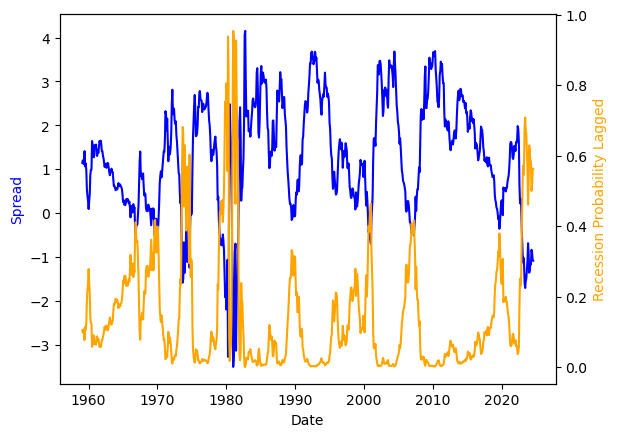

In [13]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Spread'], color='blue')
ax2 = ax.twinx()
ax2.plot(df.index, df['Rec_prob_lagged'], color='orange')
ax.set_xlabel('Date')
ax.set_ylabel('Spread', color='blue')
ax2.set_ylabel('Recession Probability Lagged', color='orange')
plt.show()

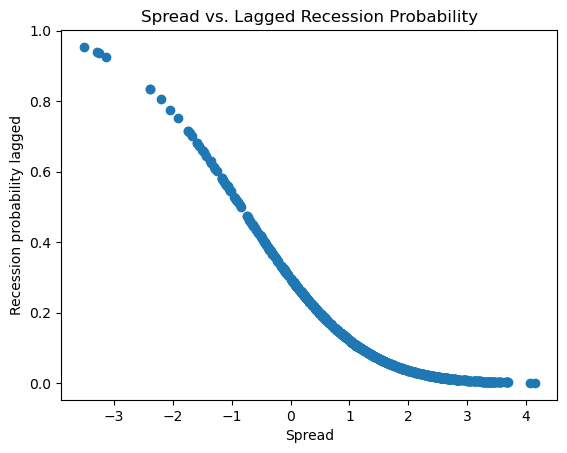

In [14]:
plt.scatter(df['Spread'], df['Rec_prob_lagged'])
plt.xlabel('Spread')
plt.ylabel('Recession probability lagged')
plt.title('Spread vs. Lagged Recession Probability')
plt.show()

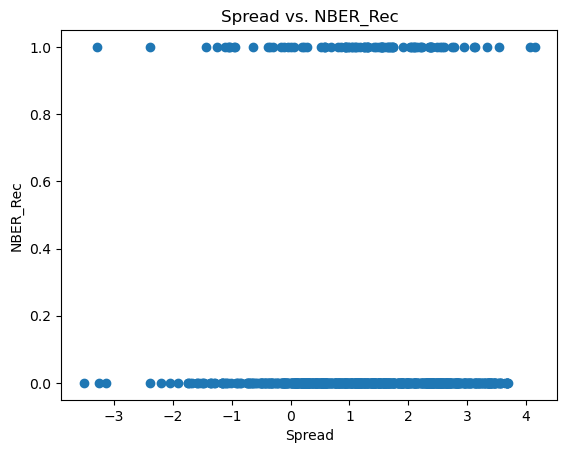

In [15]:
plt.scatter(df['Spread'], df['NBER_Rec'])
plt.xlabel('Spread')
plt.ylabel('NBER_Rec')
plt.title('Spread vs. NBER_Rec')
plt.show()

In [16]:
correlation = df['Spread'].corr(df['Rec_prob_lagged'])
print(f'Correlation is: {correlation:.2f}')

Correlation is: -0.92


In [17]:
np.corrcoef(df['Spread'], df['Rec_prob_lagged'])

array([[ 1.        , -0.92285312],
       [-0.92285312,  1.        ]])

# 6. Logistic Regression

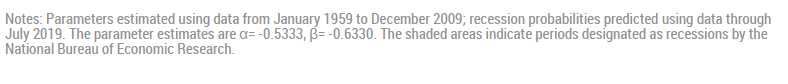

In [18]:
df

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec,Rec_prob_lagged
Date,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,0.0,0.1047
1959-02-28,3.96,2.70,2.76,1.20,0.0,0.0976
1959-03-31,3.99,2.80,2.86,1.13,0.0,0.1058
1959-04-30,4.12,2.95,3.01,1.11,0.0,0.1086
1959-05-31,4.31,2.84,2.90,1.41,0.0,0.0770
...,...,...,...,...,...,...
2024-03-31,4.21,5.24,5.38,-1.17,0.0,0.5831
2024-04-30,4.54,5.24,5.38,-0.84,0.0,0.5004
2024-05-31,4.48,5.25,5.39,-0.91,0.0,0.5182


In [19]:
# Import the statsmodels module
import statsmodels.api as sm

df2 = df['1959':'2009']
df2

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec,Rec_prob_lagged
Date,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,0.0,0.1047
1959-02-28,3.96,2.70,2.76,1.20,0.0,0.0976
1959-03-31,3.99,2.80,2.86,1.13,0.0,0.1058
1959-04-30,4.12,2.95,3.01,1.11,0.0,0.1086
1959-05-31,4.31,2.84,2.90,1.41,0.0,0.0770
...,...,...,...,...,...,...
2009-08-31,3.59,0.17,0.17,3.42,0.0,0.0035
2009-09-30,3.40,0.12,0.12,3.28,0.0,0.0045
2009-10-31,3.39,0.07,0.07,3.32,0.0,0.0042


In [20]:
# Run the regression
X = sm.add_constant(df2['Spread'])
y = df2['Rec_prob_lagged']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.220095
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Rec_prob_lagged   No. Observations:                  612
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                 -0.5026
Time:                        21:17:39   Log-Likelihood:                -134.70
converged:                       True   LL-Null:                       -89.642
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8913      0.138     -6.448      0.000      -1.162      -0.620
Spread        -1.1542      0.

## Display model & residuals

In [21]:
df2['y-predicted'] = model.predict()
df2['residuals'] = y - df2['y-predicted']
df2

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec,Rec_prob_lagged,y-predicted,residuals
Date,,,,,,,,
1959-01-31,4.02,2.82,2.88,1.14,0.0,0.1047,0.099113,0.005587
1959-02-28,3.96,2.70,2.76,1.20,0.0,0.0976,0.093098,0.004502
1959-03-31,3.99,2.80,2.86,1.13,0.0,0.1058,0.100148,0.005652
1959-04-30,4.12,2.95,3.01,1.11,0.0,0.1086,0.102248,0.006352
1959-05-31,4.31,2.84,2.90,1.41,0.0,0.0770,0.074553,0.002447
...,...,...,...,...,...,...,...,...
2009-08-31,3.59,0.17,0.17,3.42,0.0,0.0035,0.007855,-0.004355
2009-09-30,3.40,0.12,0.12,3.28,0.0,0.0045,0.009220,-0.004720
2009-10-31,3.39,0.07,0.07,3.32,0.0,0.0042,0.008807,-0.004607


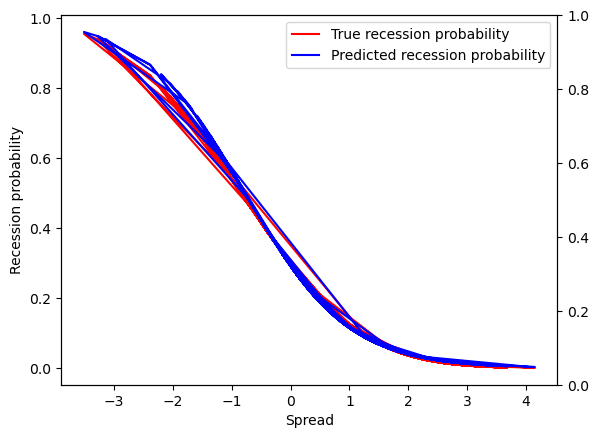

In [22]:
fig, ax = plt.subplots(sharey=True)
ax2 = ax.twinx()
ax.plot(df2['Spread'], df2['Rec_prob_lagged'], color='red', label='True recession probability')
ax.plot(df2['Spread'], df2['y-predicted'], color='blue', label='Predicted recession probability')
ax.set_xlabel('Spread')
ax.set_ylabel('Recession probability')
ax.legend()
plt.show()

## Plot the residuals. Check for non-linearity of data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


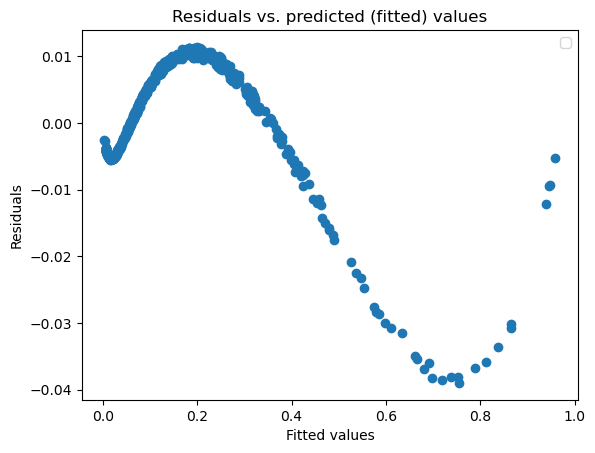

In [23]:
fig, ax = plt.subplots()
ax.scatter(df2['y-predicted'], df2['residuals'])
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.title('Residuals vs. predicted (fitted) values')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


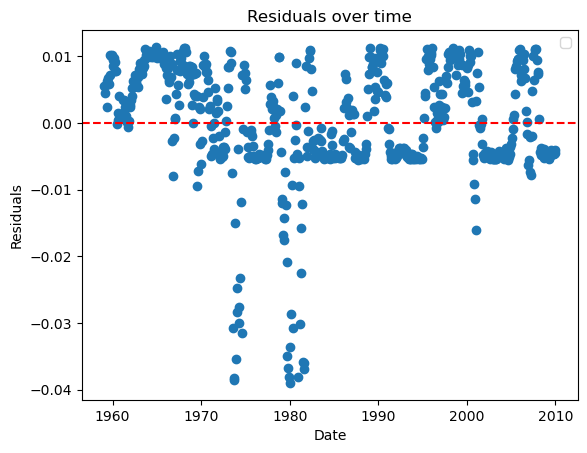

In [29]:
fig, ax = plt.subplots()
ax.scatter(df2.index, df2['residuals'])
ax.set_xlabel('Date')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals over time')
ax.legend()
plt.show()

Access just the coefficients and p-values using `params` and `p-values` attributes of `model`

In [24]:
print(f'Coefficients: \n{model.params}\n\n', end=' ')
print(f'p-values: \n{model.pvalues}', end=' ')

Coefficients: 
const    -0.891308
Spread   -1.154223
dtype: float64

 p-values: 
const     1.129747e-10
Spread    1.495928e-18
dtype: float64 